<a href="https://colab.research.google.com/github/kalinkabel/Vis-o_Computacional/blob/main/Metodo_otsu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import cv2
import numpy as np
from matplotlib  import pyplot as plt
from google.colab.patches import cv2_imshow

In [23]:
!cp -R /content/drive/MyDrive/Modulo2/Modulo2/imagens/opencv.png/imagens

cp: missing destination file operand after '/content/drive/MyDrive/Modulo2/Modulo2/imagens/opencv.png/imagens'
Try 'cp --help' for more information.


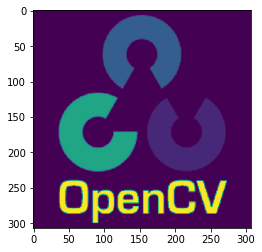

In [24]:
img = cv2.imread('/content/drive/MyDrive/Modulo2/Modulo2/imagens/opencv.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray);

In [25]:
valor, otsu = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
print("Valor de limiar Otsu: ", valor)

Valor de limiar Otsu:  97.0


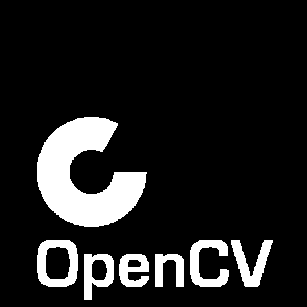

In [26]:
cv2_imshow(otsu)

In [27]:
histograma, bins = np.histogram(gray,256, [0,256])
histograma

array([65162,   905,   437,   248,    99,   116,   101,    97,    85,
          74,    96,    90,    49,    41,    57,    35,    64,    49,
          43,    60,    57,    96,    71,    52,    65,    74,    88,
          69,   120,  6256,    25,    36,    34,    16,    22,    21,
          19,    29,    27,    34,    26,    37,    19,    19,    36,
          42,    29,    16,    25,    19,    24,    29,    26,    17,
          28,    34,    21,    37,    25,    28,    26,    27,    28,
          78,    33,    31,    20,    19,    38,    22,    30,    18,
          27,    43,    64,   205,  6092,     5,     6,     5,    13,
          38,    13,    10,     6,    10,     9,    11,     8,    13,
          11,     6,     8,     6,     9,     5,     5,     5,     5,
          14,    13,     4,     7,    11,     7,     7,     6,     5,
           4,    12,    11,     8,     8,     6,    12,     4,    10,
           8,     7,    14,    15,     3,    25,    15,    19,     7,
          11,    13,

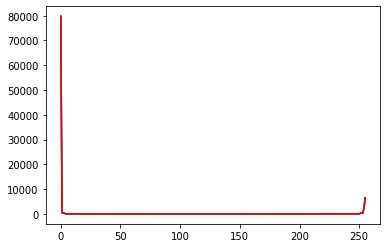

In [28]:
cores = ['b', 'g', 'r']
for cor in cores:
  hist = cv2.calcHist([img], [cores.index(cor)], None, [256], [0, 256])
  plt.plot(hist, color=cor)
plt.show() 

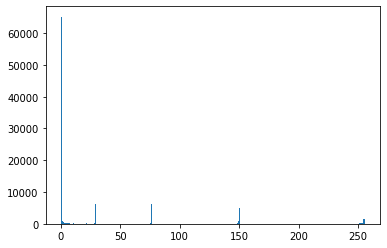

In [29]:
plt.hist(gray.ravel(), 256, [0,256]);

**Melhorando a segmentação de imagens com ruido**s  

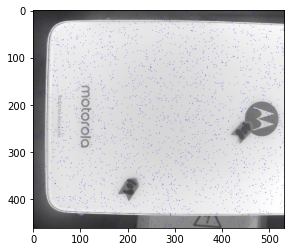

In [30]:
img2 = cv2.imread('/content/drive/MyDrive/Modulo2/Modulo2/imagens/celularRuido.jpg')
plt.imshow(img2);

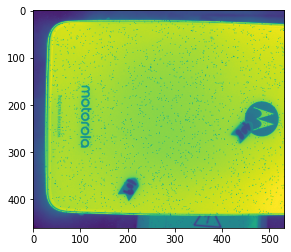

In [31]:
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
plt.imshow(gray2);

In [32]:
valor, otsu = cv2.threshold(gray2, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
print("Valor de limiar Otsu: ", valor)

Valor de limiar Otsu:  158.0


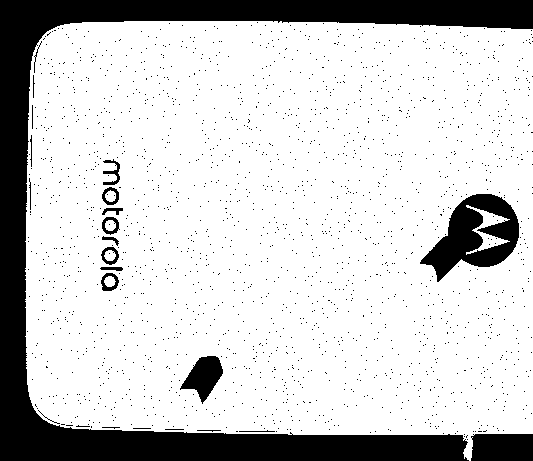

In [33]:
cv2_imshow(otsu)

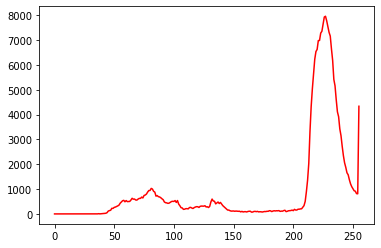

In [34]:
cores = ['b', 'g', 'r']
for cor in cores:
  hist = cv2.calcHist([img2], [cores.index(cor)], None, [256], [0, 256])
plt.plot(hist, color=cor)
plt.show() 

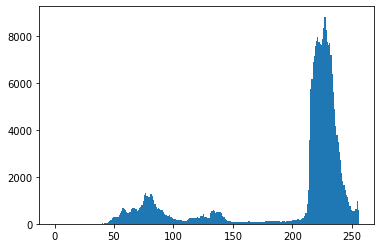

In [35]:
plt.hist(gray2.ravel(), 256, [0,256])
plt.show()

**Filtro de Mediana** - Este filtro verifica o valor mediano de uma região de pixels, o que é excelente para remover ruídos do tipo “sal e pimenta”, que é o ruído caracterizado por pontos brancos e pretos. No exemplo abaixo, será extraído o valor mediano a cada região 3x3 da imagem:

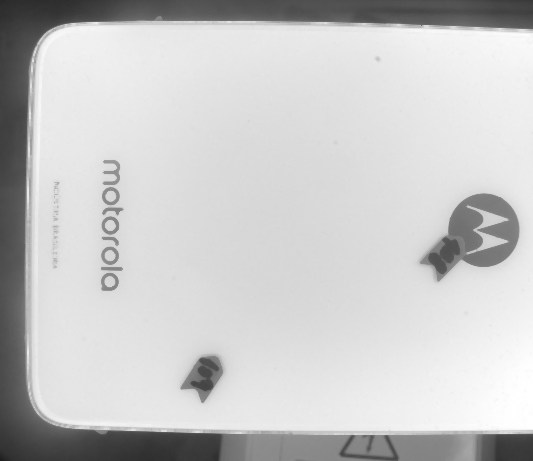

In [36]:
desfoque=cv2.medianBlur(gray2,3)
cv2_imshow(desfoque)

Valor do limiar:  158.0


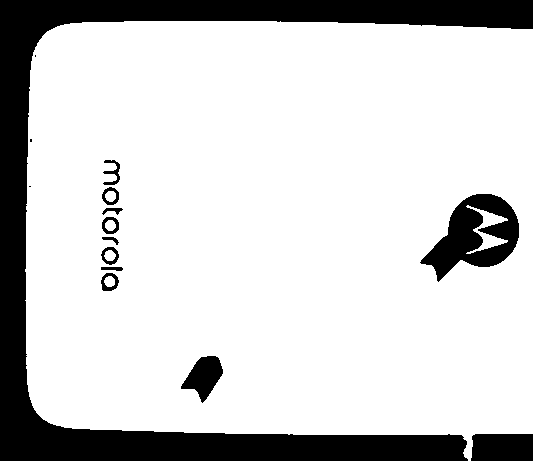

In [37]:
valor, otsu = cv2.threshold(desfoque, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
print("Valor do limiar: ", valor)
cv2_imshow(otsu)

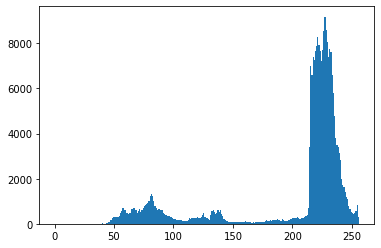

In [38]:
plt.hist(desfoque.ravel(), 256, [0,256]);